## Combining queries: query containers

In the previous example, we saw how we can use ```ms.query.query()``` to make a query that evaluates to True or False for each object, and that MuSpAn can use to return a list of all objects for which this is True. Let's load the mouse colon data again and look at a couple of queries.

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

# Load the example domain data
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


Let's suppose we've identified a particular cell of interest (e.g., by exploring the data in Xenium explorer), with the ID 'dfbfdjho-1', and we want to plot the location of all 'Sox9' transcripts within the boundary of this cell.

The Boolean statements we're going to need here are:
- A: The label 'Cell ID' is 'dfbfdjho-1'
- B: Collection is 'Cell boundaries'
- C: Collection is 'Transcripts'
- D: The label 'Transcript ID' is 'Sox9'

...and in order to get all these objects together, we want to ask for a query that gets all objects meeting the criteria A AND (B OR (C AND D)). Statements A-D can be written using the query logic that we've already seen - in fact, the relevant queries are:

In [2]:
# Define the queries for each condition

# Query A: The label 'Cell ID' is 'dfbfdjho-1'
query_A = ms.query.query(domain, ('label', 'Cell ID'), 'is', 'dfbfdjho-1')

# Query B: Collection is 'Cell boundaries'
query_B = ms.query.query(domain, ('collection',), 'is', 'Cell boundaries')

# Query C: Collection is 'Transcripts'
query_C = ms.query.query(domain, ('collection',), 'is', 'Transcripts')

# Query D: The label 'Transcript ID' is 'Sox9'
query_D = ms.query.query(domain, ('label', 'Transcript ID'), 'is', 'Sox9')

In order to ask our more complex query, we're going to need to combine these queries together. MuSpAn provides a tool for this: the <i>query container</i>. A query container is actually a very simple object: it takes in exactly two query-like objects, and combines them using one of the operators 'AND', 'OR', or 'AND NOT'. Let's make a ```ms.query.query_container()``` that asks for C AND D, i.e., that gets all Sox9 transcripts.

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

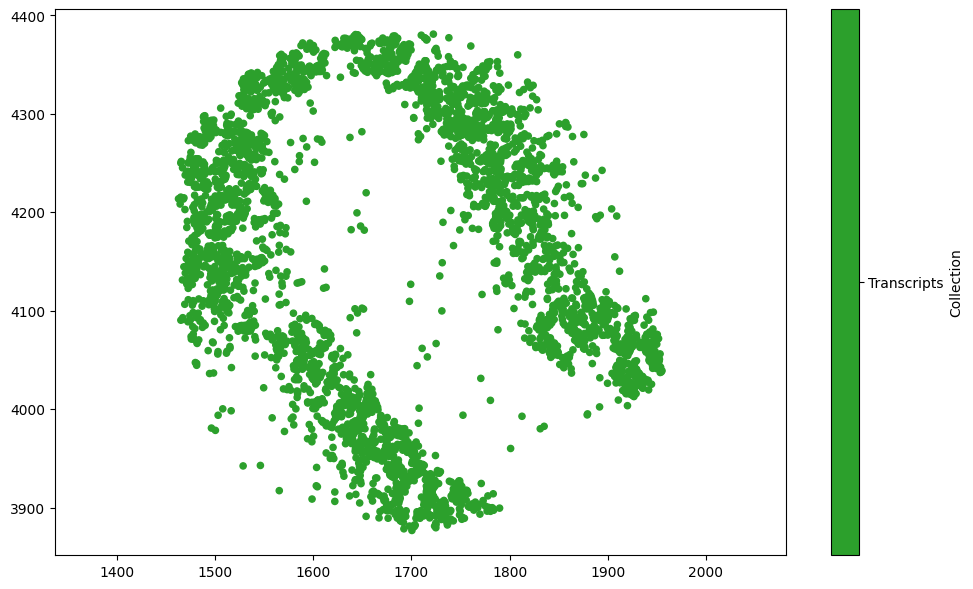

In [3]:
# Combine Query C and Query D using a query container to get all Sox9 transcripts
query_C_and_D = ms.query.query_container(query_C, 'AND', query_D)

# Plot the location of all Sox9 transcripts within the boundary of the specified cell
plt.figure(figsize=(10, 6))
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=query_C_and_D)

We can keep combining queries together to get to our complex target query, A AND (B OR (C AND D)), by using our query container inside another one:

In [4]:
# Combine Query B and Query C_and_D using a query container with 'OR' operator
query_B_or_CandD = ms.query.query_container(query_B, 'OR', query_C_and_D)

# Combine Query A and Query_B_or_CandD using a query container with 'AND' operator to get the final query
final_query = ms.query.query_container(query_A, 'AND', query_B_or_CandD)

# Print the final query to see the combination of queries
print(final_query)

(value is dfbfdjho-1) AND ((collection value is 0) OR ((collection value is 2) AND (value is Sox9)))


As queries get more and more complex, we can always use ```print``` to remind us what combination of queries the query container contains. Let's take a look at the final plot:

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

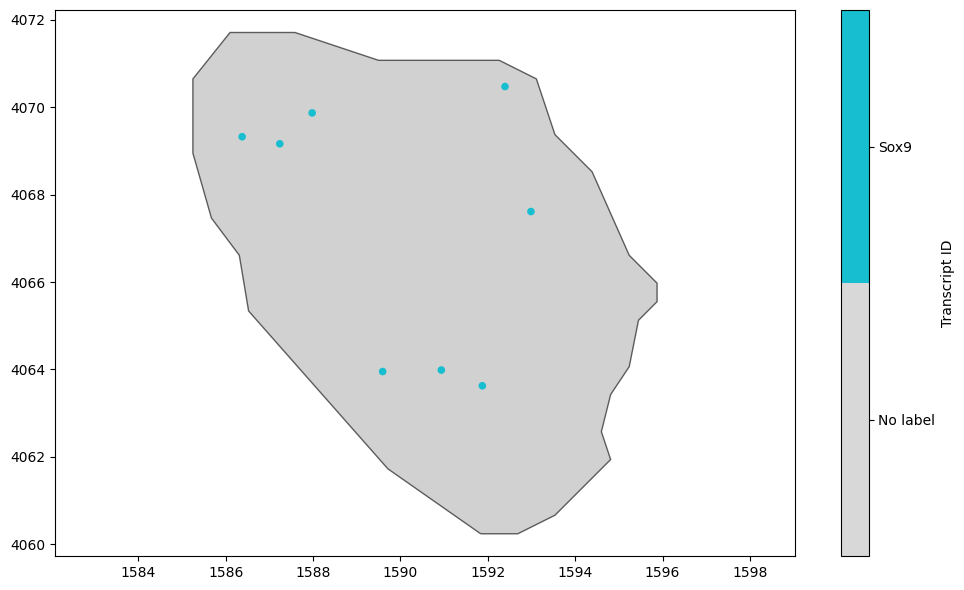

In [5]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Visualize the final query results, coloring objects by 'Transcript ID'
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=final_query, color_by='Transcript ID')

Notice that the objects identified by a query don't all have to be the same type - in this example, the same query ```final_query``` identifies a shape and 8 points.

Queries aren't just useful for visualisation, they're also a fundamental part of conducting spatial analysis. We can keep all of our data from one image within a single MuSpAn domain, and conduct different analyses on a subset of points. This is particularly useful for analysing multiplex imaging data, when we may have dozens of different cell types present, but only want to conduct a pairwise analysis between two cell types of interest. MuSpAn's query structure means that we only need to write a query identifying a population of interest once, and this query can then be passed into visualisation and analysis tools 'on the fly' to allow a targeted spatial analysis (see later tutorials).